In [1]:
import sys
import os
sys.path.insert(0, os.path.abspath('../..'))
import torch
import numpy as np
import utils
import matplotlib.pyplot as plt
%load_ext autoreload
import glob
np.random.seed(2) 
torch.manual_seed(2)

## load a checkpoint & dataset the network trained on

In [2]:
lcs = utils.get_data('../../datasets/ZTF_g')


found 3408 for band='g'
max time:  1687.1367
created union_tp attribute of length 3500
dataset created, lcs.dataset.shape=(3083, 1, 1962, 3)
train size: 2774, valid size: 555, test size: 309


/Users/mattlowery/Desktop/Desko/code/astro/hetast/src/notebooks/learning_curves


In [5]:
files = glob.glob('../checkpoints/exp_21/ZTF_g1*')
files

['../checkpoints/exp_21/ZTF_g1.1795718669891357.h5',
 '../checkpoints/exp_21/ZTF_g1.1815346479415894.h5',
 '../checkpoints/exp_21/ZTF_g1.1665329933166504.h5',
 '../checkpoints/exp_21/ZTF_g1.1654170751571655.h5']

=> loading checkpoint '../checkpoints/exp_21/ZTF_g1.1795718669891357.h5'
Namespace(data_folder='/home2/fggr82/astr/hetast/src/datasets/ZTF_g', start_col=1, checkpoint=None, seed=2, device='mps', net='HeTVAE', mixing='concat', n_union_tp=3500, embed_time=128, num_heads=16, latent_dim=64, num_ref_points=16, rec_hidden=128, width=512, niters=6000, patience=1000, batch_size=2, k_iwae=1, lr=0.0003, beta1=0.9, beta2=0.999, scheduler=True, warmup=10, factor=0.9, lr_patience=40, threshold=0.01, dropout=0.2, inc_errors=False, frac=0.5, mse_weight=5.0, kl_annealing=True, kl_itrs=6000, n_cycles=16, print_at=1, save_at=30, kl_zero=False, const_var=False, var_per_dim=False, std=0.1, num_resamples=0)
------------------------------------
args.factor=0.9
[1.1795718669891357, 0.4773416817188263, 1.4485977771983016e-05, 1.0]
------------------------------------
[<AxesSubplot:title={'center':'Learning Curves for g model'}>
 <AxesSubplot:> <AxesSubplot:xlabel='Epoch'> <AxesSubplot:> <AxesSubplot:>]
=> loa

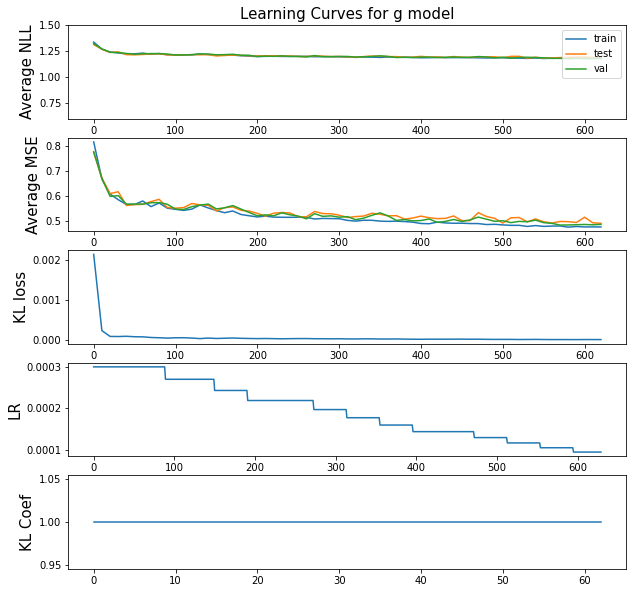

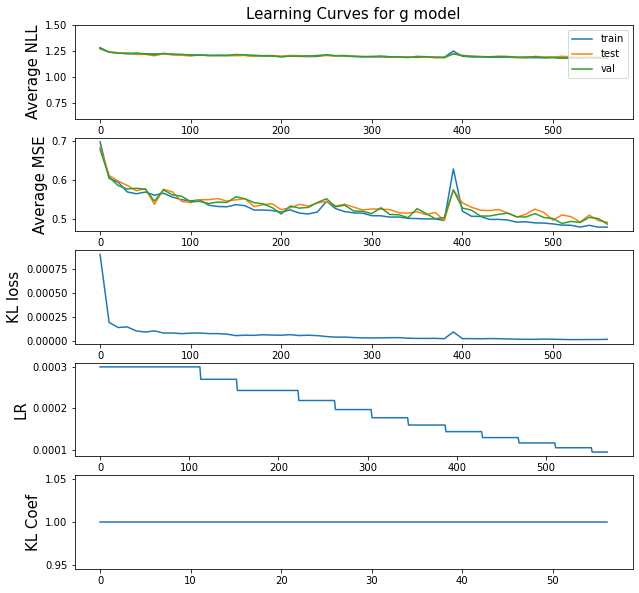

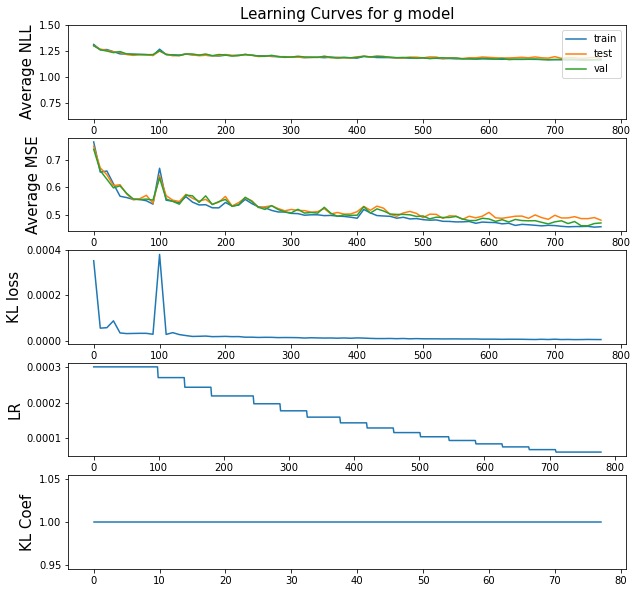

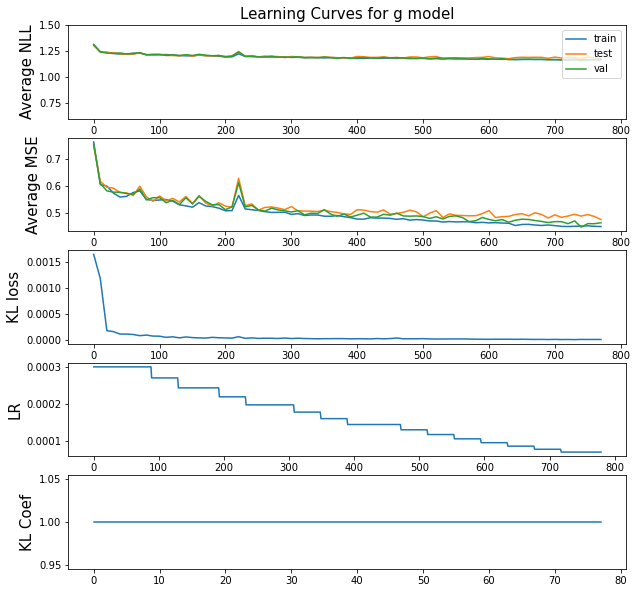

In [8]:
for file in files:
    net,optimizer,scheduler,lrs, args, epoch, losses = utils.load_checkpoint(file, lcs.data_obj)
    print('------------------------------------')
    print(f'{args.factor=}')
    print(losses[0][-1])
    print('------------------------------------')
    train_l = np.array(losses[0])
    
    val_l = np.array(losses[1])
    test_l = np.array(losses[2])
    fs = 15
    fig, ax = plt.subplots(5, figsize=(10,10))
    ax[0].set_title('Learning Curves for g model',fontsize=fs)
    ax[2].set_xlabel('Epoch',fontsize=fs)
    print(ax)
    ## NLL
    x = np.arange(0,len(losses[0])*10,10) # took metrics every 10 itrs
    ax[0].plot(x,train_l[:,0], label='train')
    ax[0].plot(x,test_l[:,0], label='test')
    ax[0].plot(x,val_l[:,0], label='val')
    ax[0].set_ylim(0.6,1.5)
    ax[0].legend(loc="upper right")
    ax[0].set_ylabel('Average NLL',fontsize=fs)
    ## MSE
    ax[1].plot(x, train_l[:,1], label='train')
    ax[1].plot(x, test_l[:,1], label='test')
    ax[1].plot(x,val_l[:,1], label='val')
    ax[1].set_ylabel('Average MSE',fontsize=fs)
    ## KL Annealing
    ax[2].plot(x,train_l[:,2])
    ax[2].set_ylabel('KL loss',fontsize=fs)

    ax[3].plot(lrs)
    ax[3].set_ylabel('LR',fontsize=fs)
    
    ax[4].plot(train_l[:,3])
    ax[4].set_ylabel('KL Coef', fontsize=fs)